In [20]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from ks_functions import *
import ks_seekcamera
from datetime import datetime
# import cv2
from scipy.interpolate import interp1d

In [87]:
# Init
interp_time = 0.1 # interpolation time [s]

In [42]:
times = ks_seekcamera.get_data(10)
times = np.array(times)
times = ((times-times[0])/(10**9)).round(2)

CONNECT: E5D608D31715
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame available: E5D608D31715 (size: 320x240)
frame availa

<Axes: >

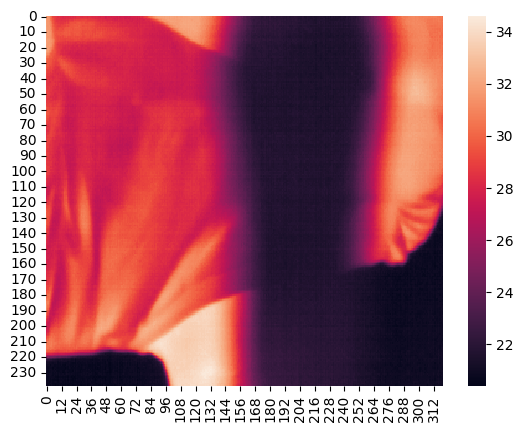

In [126]:
df = pd.read_csv("./thermography-E5D608D31715.csv",sep=" ")
frames = []
for i in range(0, len(df), 240):
    temperature_data = df.iloc[i:i+239, :].values.astype(float)
    frames.append(temperature_data)
# Example frame
sn.heatmap(frames[0])

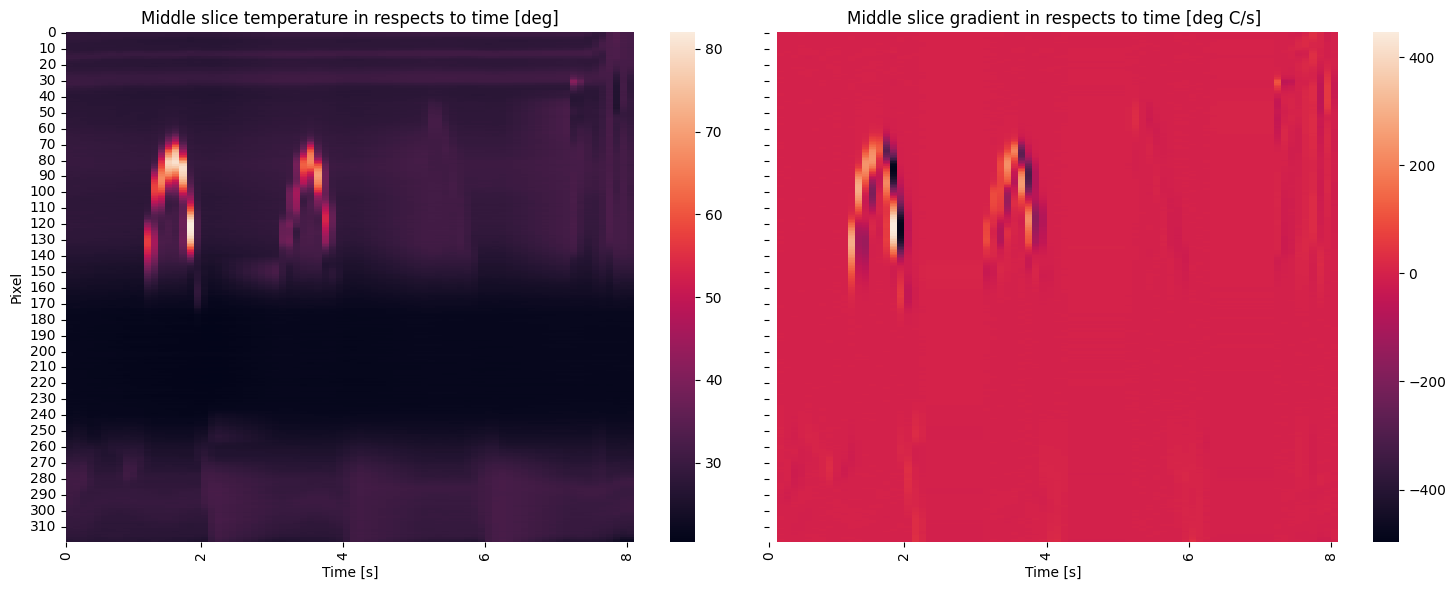

In [125]:
# Create time series of middle slice 
slice = get_slice(frames, 120)

# Interpolation of time series
interp_times = np.arange(0, max(times), interp_time)
interp_temps = []
for _, frame in enumerate(slice.T):
    interp_func = interp1d(times, frame)
    new_temps = interp_func(interp_times)
    interp_temps.append(new_temps)

# Create DataFrame
df_temps = pd.DataFrame(interp_temps, columns=interp_times)

fig, axs = plt.subplots(1,2,figsize= (15,6), sharey=True, sharex=True)
axs = axs.ravel()

# Plot heatmaps
sn.heatmap(df_temps, ax= axs[0])

gradient = df_temps.diff(axis=1)/interp_time
sn.heatmap(gradient, ax=axs[1])

# Adjust plot
for ax in axs:
    num_ticks = 5  # Change this number to adjust the number of ticks
    ax.set_xticks(np.linspace(0, len(interp_times) - 1, num_ticks, dtype=int))
    ax.set_xticklabels([f"{interp_times[i]:.0f}" for i in x_tick_positions])
axs[0].set_title("Middle slice temperature in respects to time [deg]")
axs[0].set_ylabel("Pixel")
axs[0].set_xlabel("Time [s]")
axs[0].set_label('Temperature [deg C]')
axs[1].set_title("Middle slice gradient in respects to time [deg C/s]")
axs[1].set_xlabel("Time [s]")

plt.tight_layout()
plt.show()